# Temperature Forecast Project using ML

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [1]:
#Importing the necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


The dataset has 7752 rows and 25 columns

## Understanding the dataset and EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


As we can observe from the above table, we can see that only the Date column contains object datatype, while the others including the target columns are of float datatype. 

Since the Date column can be further split into Day, Month and Year columns, let us proceed in converting the date column into further columns that we can analyze.

In [4]:
df["Day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["Month"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.month
df["Year"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.month
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,6.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,6.0
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,6.0
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,6.0
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,8.0
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,8.0
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,8.0
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


Since we have the date in the form of 3 separate column, let us drop the Date column from the original dataset

In [5]:
df.drop("Date", axis = 1, inplace = True)

df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,8.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,8.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,8.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


As we can see, the dataset now reshapes to 7752 rows and 27 columns.

Checking for null values

In [6]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [7]:
#Dropping the null values from the dataset
df.dropna(inplace = True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,8.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,8.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,8.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,8.0


In [9]:
((7752-7588)/7752)*100

2.1155830753353975

As seen above, the dataloss in this dataset after dropping the null values is a little above 2%.

This concludes that we arent losing a lot of data, and hence, we can drop the null values and proceed further with data processing and analysis.

In [10]:
#Checking for skewness in the dataset
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                -0.010718
Month              -0.174856
Year               -0.174856
dtype: float64

It is clear to note that there is skewness in the dataset. 

The maximum skewness is present in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope and LDAPS_WS. 
However, there are small skewness present in other columns as well such as LDAPS_RHmax, LDAPS_Tmin_lapse, LDAPS_LH, LDAPS_CC3, LDAPS_CC4. 

Let us now proceed to remove this skewness in the dataset.

In [11]:
#Removing skewness in columns outside the range of +/-0.55
from scipy.stats import yeojohnson
df["LDAPS_PPT1"]=yeojohnson(df["LDAPS_PPT1"],0)
df["LDAPS_PPT2"]=yeojohnson(df["LDAPS_PPT2"],0)
df["LDAPS_PPT3"]=yeojohnson(df["LDAPS_PPT3"],0)
df["LDAPS_PPT4"]=yeojohnson(df["LDAPS_PPT4"],0)
df["DEM"]=yeojohnson(df["DEM"],0)
df["Slope"]=yeojohnson(df["Slope"],0)
df["LDAPS_WS"]=yeojohnson(df["LDAPS_WS"],0)
df["LDAPS_RHmax"]=yeojohnson(df["LDAPS_RHmax"],0)
df["LDAPS_Tmin_lapse"]=yeojohnson(df["LDAPS_Tmin_lapse"],0)
df["LDAPS_LH"]=yeojohnson(df["LDAPS_LH"],0)
df["LDAPS_CC3"]=yeojohnson(df["LDAPS_CC3"],0)
df["LDAPS_CC4"]=yeojohnson(df["LDAPS_CC3"],0)

## Visualizations 

### Checking for outliers

station                AxesSubplot(0.125,0.808774;0.227941x0.0712264)
Present_Tmax        AxesSubplot(0.398529,0.808774;0.227941x0.0712264)
Present_Tmin        AxesSubplot(0.672059,0.808774;0.227941x0.0712264)
LDAPS_RHmin            AxesSubplot(0.125,0.723302;0.227941x0.0712264)
LDAPS_RHmax         AxesSubplot(0.398529,0.723302;0.227941x0.0712264)
LDAPS_Tmax_lapse    AxesSubplot(0.672059,0.723302;0.227941x0.0712264)
LDAPS_Tmin_lapse        AxesSubplot(0.125,0.63783;0.227941x0.0712264)
LDAPS_WS             AxesSubplot(0.398529,0.63783;0.227941x0.0712264)
LDAPS_LH             AxesSubplot(0.672059,0.63783;0.227941x0.0712264)
LDAPS_CC1              AxesSubplot(0.125,0.552358;0.227941x0.0712264)
LDAPS_CC2           AxesSubplot(0.398529,0.552358;0.227941x0.0712264)
LDAPS_CC3           AxesSubplot(0.672059,0.552358;0.227941x0.0712264)
LDAPS_CC4              AxesSubplot(0.125,0.466887;0.227941x0.0712264)
LDAPS_PPT1          AxesSubplot(0.398529,0.466887;0.227941x0.0712264)
LDAPS_PPT2          

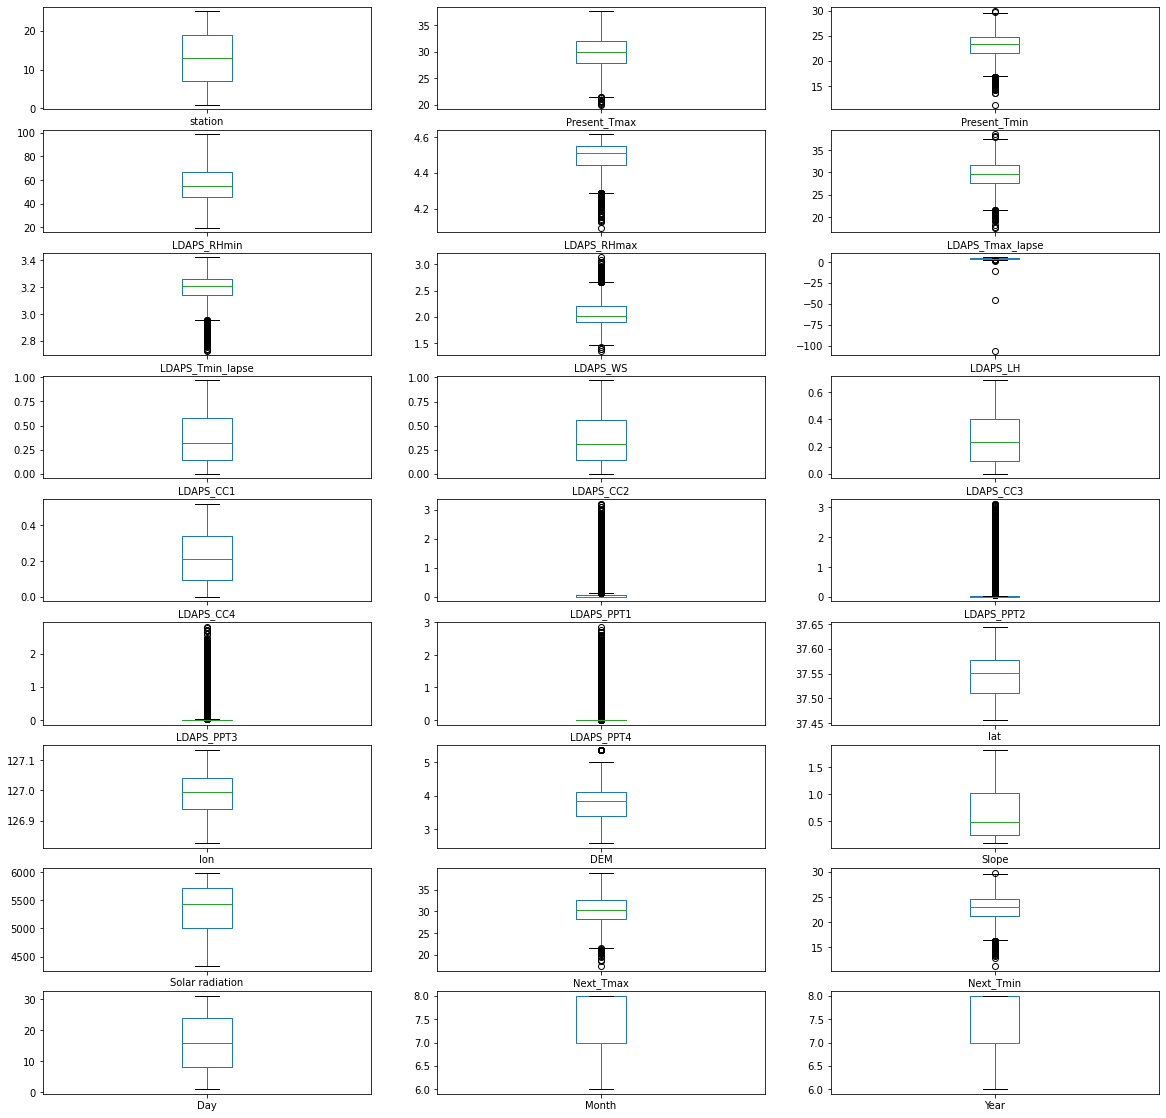

In [16]:
df.plot(kind = "box",subplots = True, layout = (9,3), figsize = (20,20))

As seen in the above depiction, it is clear to note that many columns such as LDAPS_PPT4, LDAPS_PPT3 etc all have outliers.

For efficient machine learning model, let us proceed in removing the outliers.

In [17]:
from scipy.stats import zscore

In [18]:
z=np.abs(zscore(df))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.57877772, 2.77335883,
        2.77335883],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.57877772, 2.77335883,
        2.77335883],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.57877772, 2.77335883,
        2.77335883],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 1.57877772, 1.01021665,
        1.01021665],
       [1.52214457, 2.17321212, 2.28923218, ..., 1.57877772, 1.01021665,
        1.01021665],
       [1.66069897, 2.20691387, 2.41419461, ..., 1.57877772, 1.01021665,
        1.01021665]])

In [19]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [20]:
df_new = df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,4.523053,28.074101,3.178343,2.056542,4.254929,0.233947,...,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,21.2,30.0,6.0,6.0
1,2.0,31.9,21.6,52.263397,4.517483,29.850689,3.220275,1.900896,3.969111,0.225508,...,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,22.5,30.0,6.0,6.0
2,3.0,31.6,23.3,48.690479,4.442340,30.091292,3.241249,1.965464,3.071445,0.209344,...,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,23.9,30.0,6.0,6.0
3,4.0,32.0,23.4,58.239788,4.579685,29.704629,3.191553,1.894624,4.200612,0.216372,...,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,24.3,30.0,6.0,6.0
4,5.0,31.4,21.9,56.174095,4.512563,29.113934,3.198121,1.907318,4.691032,0.151407,...,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,22.5,30.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.372751,27.812697,2.960261,2.028576,2.362181,0.052902,...,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,17.7,30.0,8.0,8.0
7746,22.0,22.5,17.4,30.094858,4.438998,26.704905,2.934603,1.912218,4.420607,0.066461,...,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,17.1,30.0,8.0,8.0
7747,23.0,23.3,17.1,26.741310,4.380399,26.352081,2.984453,1.966961,4.291258,0.030034,...,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,18.1,30.0,8.0,8.0
7748,24.0,23.3,17.7,24.040634,4.360483,27.010193,2.982319,2.020596,3.876219,0.035874,...,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,18.8,30.0,8.0,8.0


In [21]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [25]:
df_new = df_new[["station","Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse", "LDAPS_WS", "LDAPS_LH", "LDAPS_CC1", "LDAPS_CC2", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "lat", "lon", "DEM", "Slope", "Solar radiation", "Day", "Month", "Year", "Next_Tmax", "Next_Tmin"]]

In [26]:
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,4.523053,28.074101,3.178343,2.056542,4.254929,0.233947,...,37.6046,126.991,5.362864,1.331046,5992.895996,30.0,6.0,6.0,29.1,21.2
1,2.0,31.9,21.6,52.263397,4.517483,29.850689,3.220275,1.900896,3.969111,0.225508,...,37.6046,127.032,3.823463,0.414821,5869.312500,30.0,6.0,6.0,30.5,22.5
2,3.0,31.6,23.3,48.690479,4.442340,30.091292,3.241249,1.965464,3.071445,0.209344,...,37.5776,127.058,3.535344,0.235941,5863.555664,30.0,6.0,6.0,31.1,23.9
3,4.0,32.0,23.4,58.239788,4.579685,29.704629,3.191553,1.894624,4.200612,0.216372,...,37.6450,127.022,3.844087,1.262657,5856.964844,30.0,6.0,6.0,31.7,24.3
4,5.0,31.4,21.9,56.174095,4.512563,29.113934,3.198121,1.907318,4.691032,0.151407,...,37.5507,127.135,3.584574,0.409125,5859.552246,30.0,6.0,6.0,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.372751,27.812697,2.960261,2.028576,2.362181,0.052902,...,37.5507,127.040,3.306813,0.452412,4456.024414,30.0,8.0,8.0,27.6,17.7
7746,22.0,22.5,17.4,30.094858,4.438998,26.704905,2.934603,1.912218,4.420607,0.066461,...,37.5102,127.086,3.134050,0.125045,4441.803711,30.0,8.0,8.0,28.0,17.1
7747,23.0,23.3,17.1,26.741310,4.380399,26.352081,2.984453,1.966961,4.291258,0.030034,...,37.5372,126.891,2.808655,0.144447,4443.313965,30.0,8.0,8.0,28.3,18.1
7748,24.0,23.3,17.7,24.040634,4.360483,27.010193,2.982319,2.020596,3.876219,0.035874,...,37.5237,126.909,2.906661,0.200734,4438.373535,30.0,8.0,8.0,28.6,18.8


Let us now proceed with this refined dataset to prepare our model.

## Correlation between columns

<AxesSubplot:>

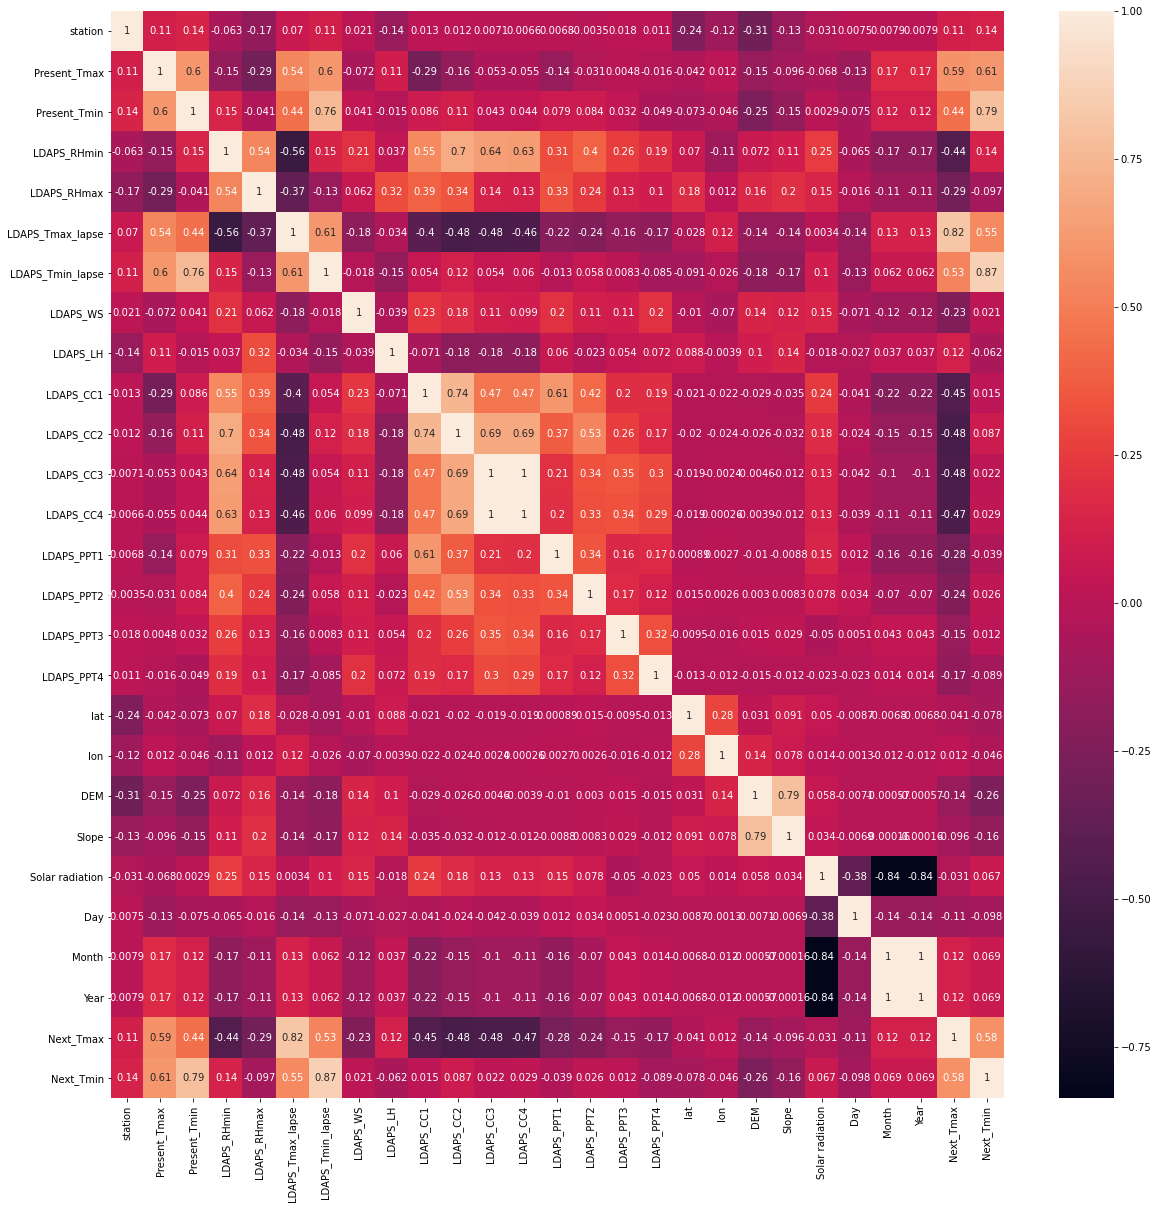

In [28]:
df_new_corr = df_new.corr()
plt.figure(figsize = (20,20))
sb.heatmap(df_new_corr, annot = True)

As we can see in the above figure, it is clear to note that not all attributes of the dataset are impacting the target columns one way or another. It is also clear to note that not all columns affect the target columns particularly positively or particularly negatively.

## Building a Predictive Model

In [29]:
#Splitting the Data into Training and Testing Parts
from sklearn.model_selection import train_test_split

In [33]:
X = df_new.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)

In [34]:
Y = df_new[['Next_Tmax', 'Next_Tmin']]

Since the target columns 'Next_Tmax' & 'Next_Tmin' contain continous values, we have to build a regression model.

Also, since there are 2 target columns, the only regression model that can work is ExtraTreesRegressor.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.metrics import r2_score

In [40]:
#Finding the best random state
max_rscore = 0
r_state = 0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = r_state)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    predlr = lr.predict(X_test)
    r2_scr = r2_score(Y_test,predlr)
    if r2_scr > max_rscore:
        max_rscore = r2_scr
        r_state = i

print("Max r2_score is ", max_rscore, "on random state ", r_state)

Max r2_score is  0.797323842104667 on random state  2


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 2)

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,Y_train)
predetr = etr.predict(X_test)

In [44]:
etr.score(X_train,Y_train)

1.0

In [45]:
r2_score(Y_test,predetr)

0.9023310364438102